# **Árvore de Decisão**

**Vantagens:**
* Fácil interpretação
* Não precisa de normalização ou padronização
* Rápido para classificar novos registros

**Desvantagens:**
* Geraçõa de árvores muito complexas
* Pequenas mudanças nos dados podem mudar a árvore (poda pode ajudar)
* Problema NP-completo para construir a árvore

In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Base de Risco de Crédito

In [3]:
import pickle

with open('risco_credito.pkl',mode='rb') as f:
    [X_risco_credito, y_risco_credito] = pickle.load(f)

In [4]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X=X_risco_credito, y=y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [5]:
display(arvore_risco_credito.classes_)
display(arvore_risco_credito.feature_importances_)

array(['alto', 'baixo', 'moderado'], dtype=object)

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

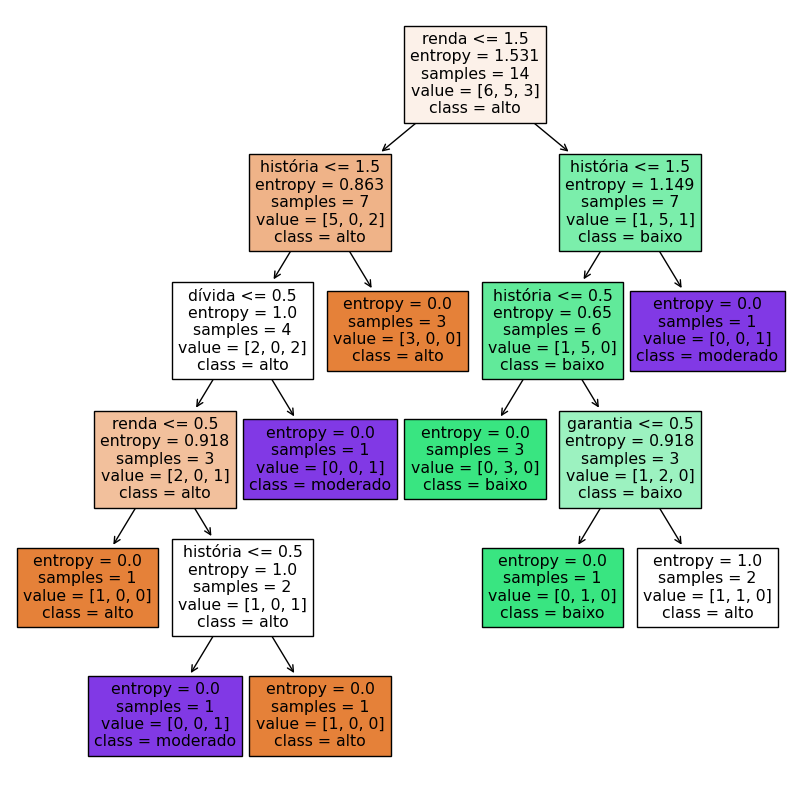

In [6]:
from sklearn import tree

previsores = ['história','dívida','garantia','renda']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [7]:
# hhistória boa [0] | dívida alta [0] | garantia nenhuma [1] | renda >35 [2]
previsoes = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
display(previsoes)

array(['baixo', 'alto'], dtype=object)

### Base de Crédito

In [8]:
with open('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/credit.pkl',mode='rb') as f:
    [X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste] = pickle.load(f)
    
X_credit_treinamento = np.array(X_credit_treinamento)
y_credit_treinamento = np.array(y_credit_treinamento)
X_credit_teste = np.array(X_credit_teste)
y_credit_teste = np.array(y_credit_teste)

In [9]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X=X_credit_treinamento, y=y_credit_treinamento)

previsoes = arvore_credit.predict(X=X_credit_teste)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_credit_teste,previsoes),'\n')
print(confusion_matrix(y_credit_teste,previsoes),'\n')
print(classification_report(y_credit_teste,previsoes))

0.982 

[[430   6]
 [  3  61]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [11]:
classes = []
for i in range(len(arvore_credit.classes_)):
    classes.append(str(arvore_credit.classes_[i]))

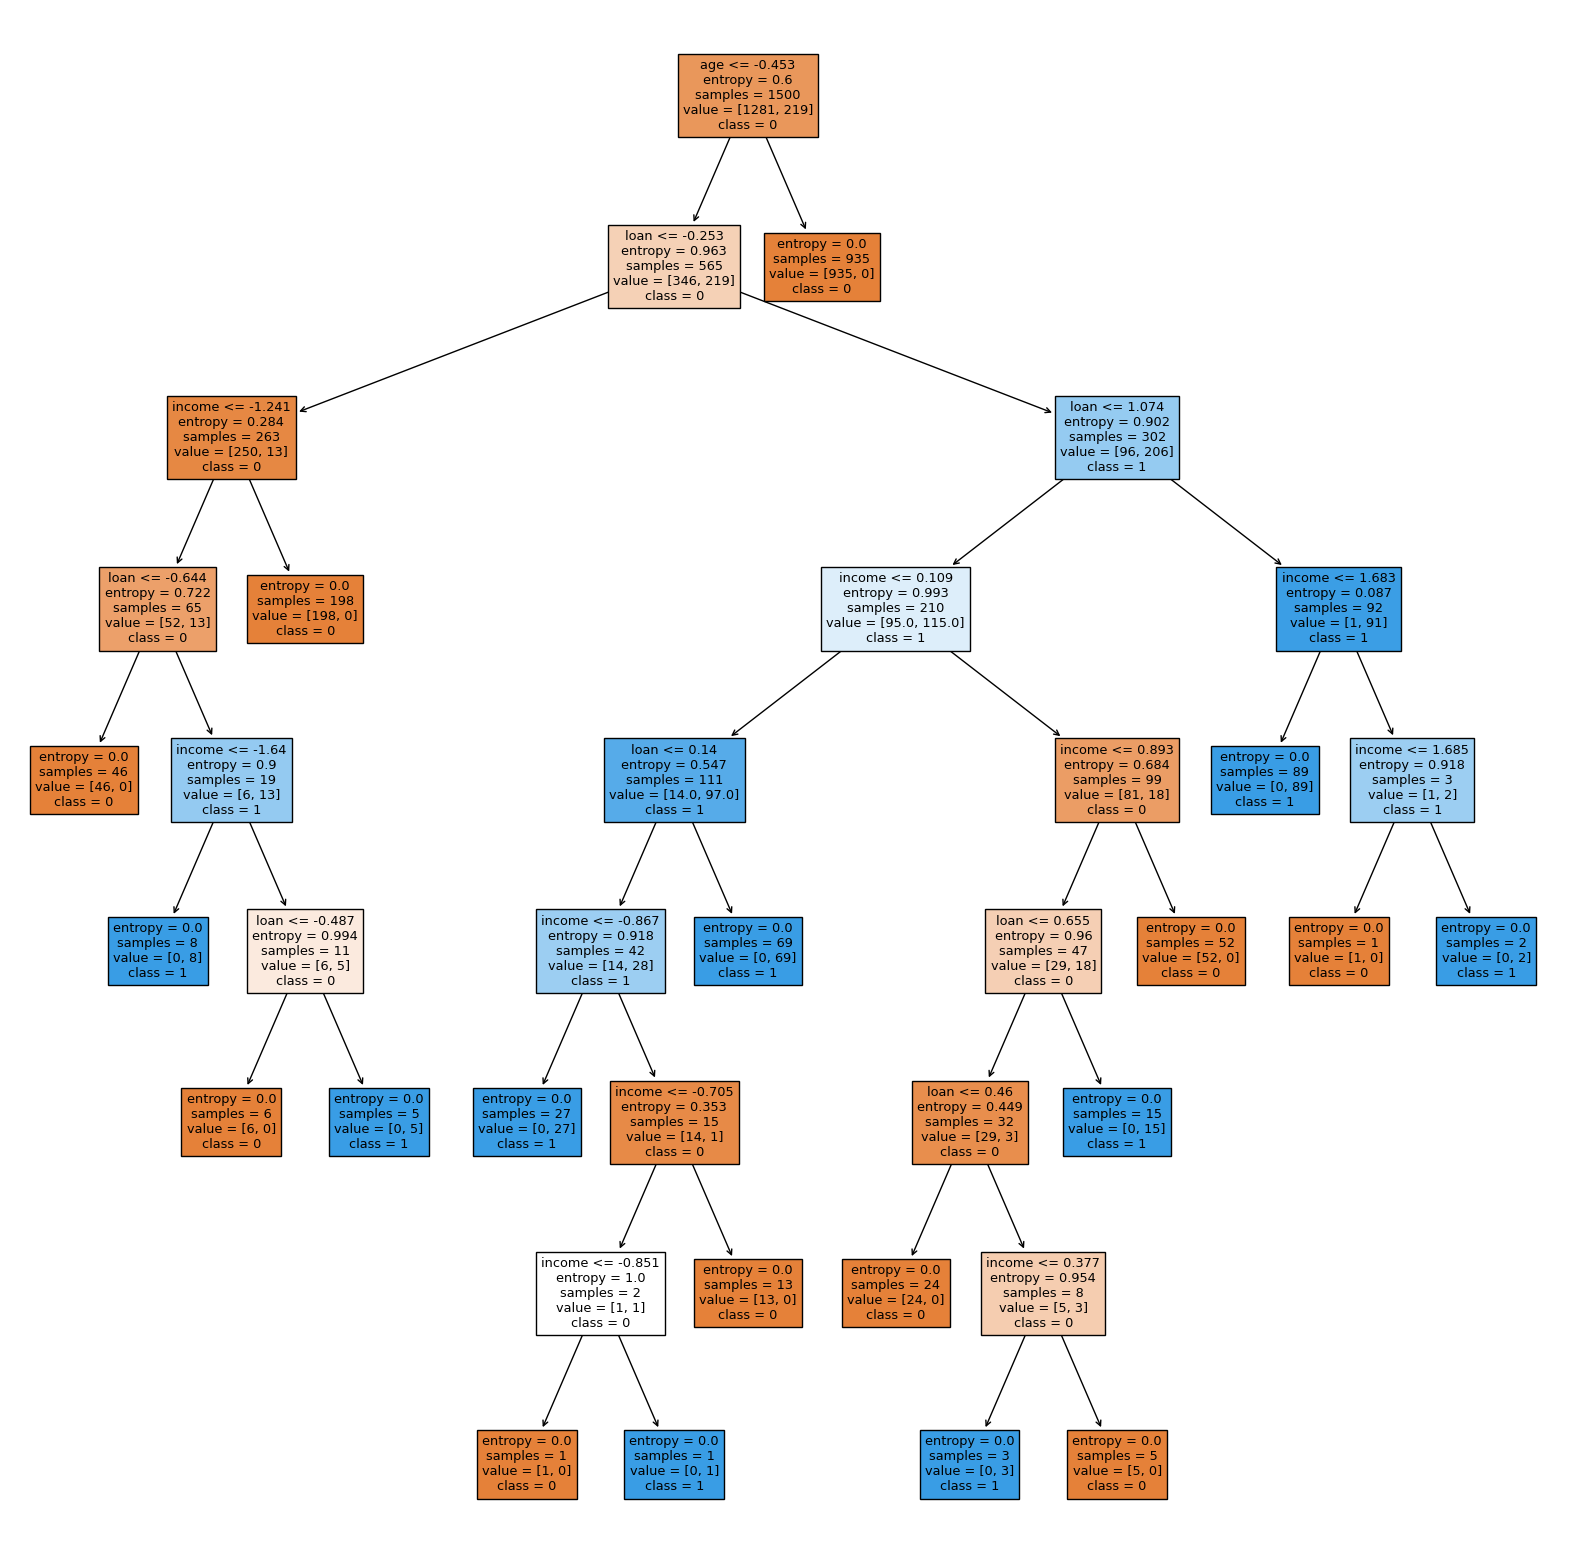

In [12]:
previsores = ['income','age','loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, filled=True, class_names=classes);

### Base do Censo

In [13]:
with open('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/census.pkl',mode='rb') as f:
    [X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste] = pickle.load(f)

X_census_treinamento = np.array(X_census_treinamento)
y_census_treinamento = np.array(y_census_treinamento)
X_census_teste = np.array(X_census_teste)
y_census_teste = np.array(y_census_teste)

In [14]:
arvore_census = DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_census.fit(X=X_census_treinamento, y=y_census_treinamento)

previsoes = arvore_census.predict(X=X_census_teste)

In [15]:
print(accuracy_score(y_census_teste,previsoes),'\n')
print(confusion_matrix(y_census_teste,previsoes),'\n')
print(classification_report(y_census_teste,previsoes))

0.8104401228249745 

[[3227  466]
 [ 460  732]] 

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# **Florestas Randômicas**

### Base de Crédito

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X=X_credit_treinamento, y=y_credit_treinamento)

previsoes = random_forest_credit.predict(X=X_credit_teste)

In [37]:
print(accuracy_score(y_credit_teste,previsoes),'\n')
print(confusion_matrix(y_credit_teste,previsoes),'\n')
print(classification_report(y_credit_teste,previsoes))

0.984 

[[433   3]
 [  5  59]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



### Base do Censo

In [44]:
from sklearn.ensemble import RandomForestClassifier

random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(X=X_census_treinamento, y=y_census_treinamento)

previsoes = random_forest_census.predict(X=X_census_teste)

In [45]:
print(accuracy_score(y_census_teste,previsoes),'\n')
print(confusion_matrix(y_census_teste,previsoes),'\n')
print(classification_report(y_census_teste,previsoes))

0.8507676560900717 

[[3420  273]
 [ 456  736]] 

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

